In [1]:
# import python packages
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [2]:
'''
This part of code is for loading and examing images
'''
# create data directory
import pathlib
data_root = pathlib.Path('/Users/A/Desktop/dataset/dataset')
print(data_root)

\Users\A\Desktop\dataset\dataset


In [3]:
# check dataset
for item in data_root.iterdir():
    print(item)

\Users\A\Desktop\dataset\dataset\0
\Users\A\Desktop\dataset\dataset\1
\Users\A\Desktop\dataset\dataset\10
\Users\A\Desktop\dataset\dataset\11
\Users\A\Desktop\dataset\dataset\12
\Users\A\Desktop\dataset\dataset\13
\Users\A\Desktop\dataset\dataset\14
\Users\A\Desktop\dataset\dataset\15
\Users\A\Desktop\dataset\dataset\16
\Users\A\Desktop\dataset\dataset\17
\Users\A\Desktop\dataset\dataset\18
\Users\A\Desktop\dataset\dataset\19
\Users\A\Desktop\dataset\dataset\2
\Users\A\Desktop\dataset\dataset\20
\Users\A\Desktop\dataset\dataset\21
\Users\A\Desktop\dataset\dataset\22
\Users\A\Desktop\dataset\dataset\23
\Users\A\Desktop\dataset\dataset\3
\Users\A\Desktop\dataset\dataset\4
\Users\A\Desktop\dataset\dataset\5
\Users\A\Desktop\dataset\dataset\6
\Users\A\Desktop\dataset\dataset\7
\Users\A\Desktop\dataset\dataset\8
\Users\A\Desktop\dataset\dataset\9


In [4]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

2445

In [5]:
all_image_paths[:10]

['\\Users\\A\\Desktop\\dataset\\dataset\\17\\1094_17.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\22\\94_22.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\21\\1669_21.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\22\\548_22.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\0\\622_0.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\5\\842_5.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\2\\2106_2.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\1\\1006_1.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\4\\913_4.png',
 '\\Users\\A\\Desktop\\dataset\\dataset\\6\\366_6.png']

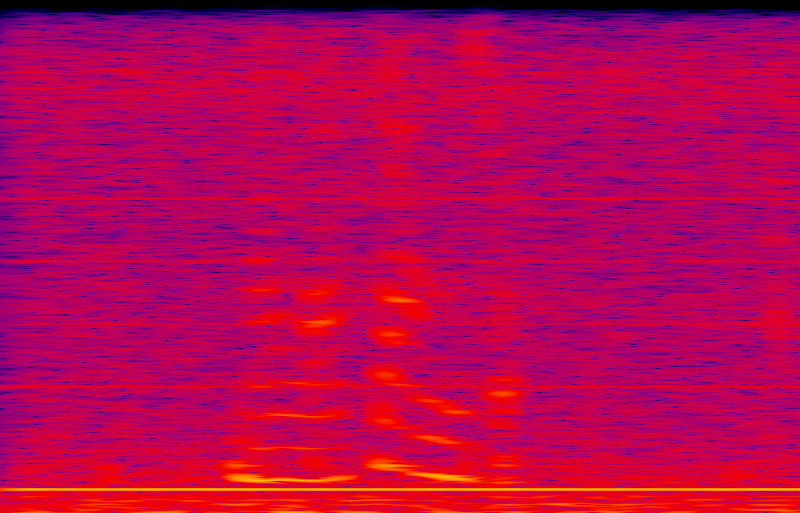

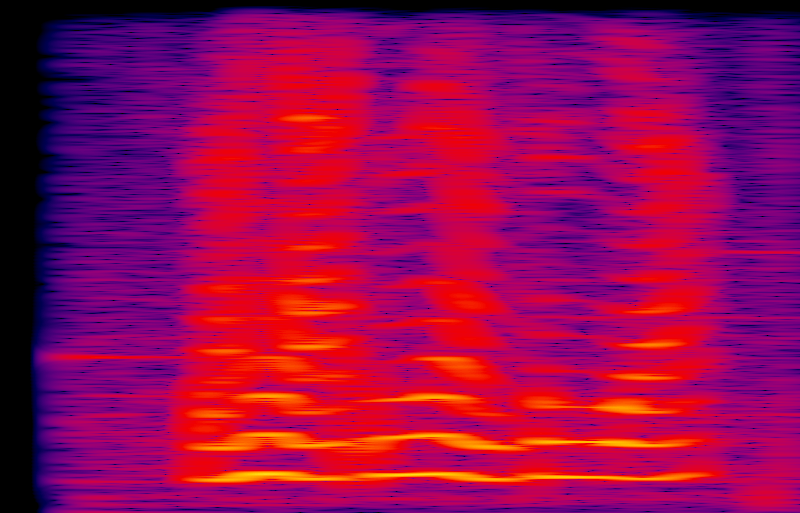

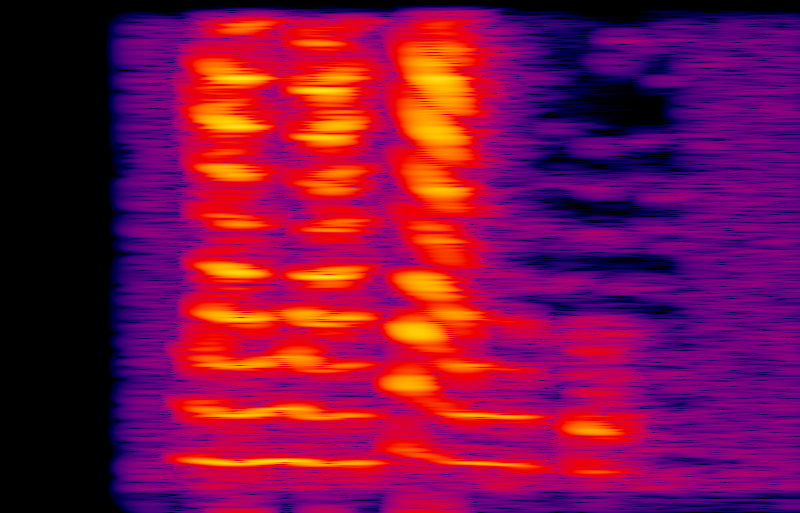

In [6]:
# check images
import IPython.display as display
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))

In [7]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_to_index = dict((name, index) for index, name in enumerate(label_names))
all_image_labels = [label_to_index[pathlib.Path(path).parent.name] for path in all_image_paths]
img_path = all_image_paths[0]
img_raw = tf.io.read_file(img_path)
img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)


(513, 800, 3)


In [8]:
'''
This part of code is for creating a dataset
'''
batch_size = 32
img_height = 32
img_width = 64

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_root,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_root,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2445 files belonging to 24 classes.
Using 1956 files for training.
Found 2445 files belonging to 24 classes.
Using 489 files for validation.


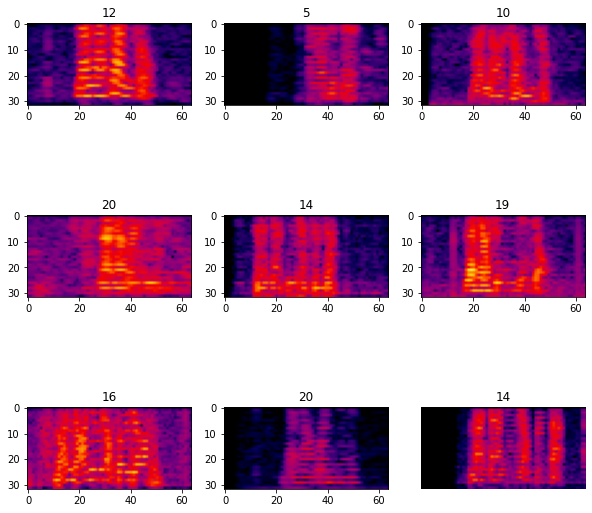

In [10]:
class_names = train_ds.class_names
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 32, 64, 3)
(32,)


In [12]:
# Configure dataset for performance
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [35]:
from tensorflow.keras.layers import LSTM

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    #layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.25),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    
    layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    
    #layers.Conv2D(128, 3, padding = 'same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.25),
    
    #layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    #layers.Dropout(0.25),
    #layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.25),
    #layers.Dropout(0.25),
    layers.Flatten(),
    
    #layers.Reshape((-1, 32)),
    #layers.Bidirectional(LSTM(128, )),
    #layers.LSTM(128, ),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(24),
    
  
  
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 32, 64, 3)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 64, 3)         12        
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 64, 32)        896       
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 16, 32, 32)        0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 16, 32, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 8, 16, 32)       

In [36]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
# Train the Model
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
62/62 [==============================] - 6s 95ms/step - loss: 0.2670 - accuracy: 0.9090 - val_loss: 1.1527 - val_accuracy: 0.7035
Epoch 2/100
62/62 [==============================] - 6s 94ms/step - loss: 0.2744 - accuracy: 0.9105 - val_loss: 1.1645 - val_accuracy: 0.7035
Epoch 3/100
62/62 [==============================] - 6s 94ms/step - loss: 0.2772 - accuracy: 0.9126 - val_loss: 1.0347 - val_accuracy: 0.7157
Epoch 4/100
62/62 [==============================] - 6s 94ms/step - loss: 0.2669 - accuracy: 0.9141 - val_loss: 1.1258 - val_accuracy: 0.7178
Epoch 5/100
62/62 [==============================] - 6s 99ms/step - loss: 0.2671 - accuracy: 0.9238 - val_loss: 1.0942 - val_accuracy: 0.7198
Epoch 6/100
62/62 [==============================] - 6s 97ms/step - loss: 0.2857 - accuracy: 0.9003 - val_loss: 1.1028 - val_accuracy: 0.7157
Epoch 7/100
62/62 [==============================] - 6s 95ms/step - loss: 0.2550 - accuracy: 0.9172 - val_loss: 1.0726 - val_accuracy: 0.7198
Epoch 

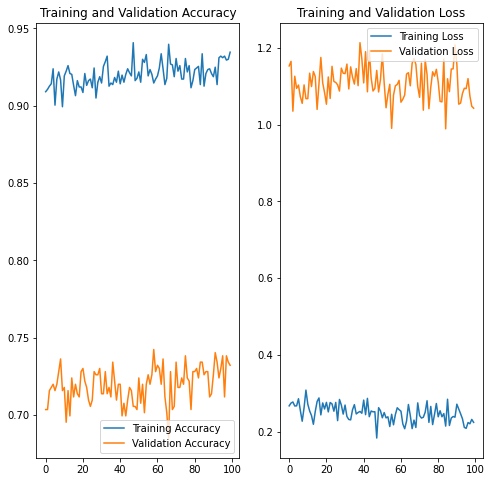

In [40]:
# Visualize the Result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_root,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_root,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2445 files belonging to 24 classes.
Using 1956 files for training.
Found 2445 files belonging to 24 classes.
Using 489 files for validation.


In [158]:
# Data Augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    #layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    
  ]

)

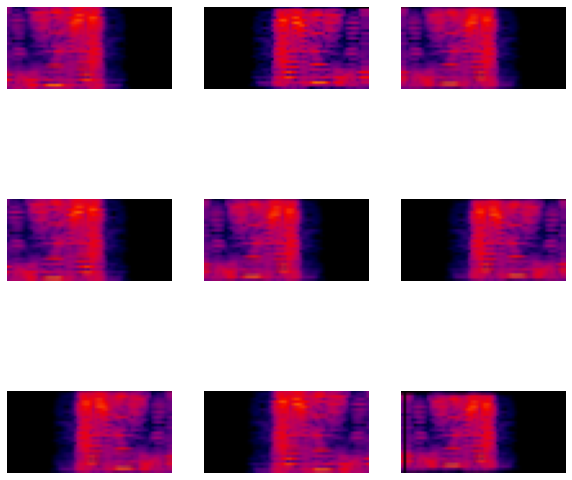

In [166]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [174]:
# Dropout
model = Sequential([
  data_augmentation,
  layers.BatchNormalization(),
    #layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.25),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    #layers.Conv2D(128, 3, padding = 'same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.25),
    
    #layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    #layers.Dropout(0.25),
    #layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.25),
    #layers.Dropout(0.25),
    layers.Flatten(),
    
    #layers.Reshape((-1, 32)),
    #layers.Bidirectional(LSTM(128, )),
    #layers.LSTM(128, ),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(24),
    
])

In [175]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [176]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_38 (Sequential)   (None, 32, 64, 3)         0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 64, 3)         12        
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 32, 64, 32)        896       
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 16, 32, 32)        0         
_________________________________________________________________
dropout_188 (Dropout)        (None, 16, 32, 32)        0         
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 16, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 8, 16, 32)       

In [178]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
62/62 [==============================] - 36s 587ms/step - loss: 2.1336 - accuracy: 0.3062 - val_loss: 1.9541 - val_accuracy: 0.3845
Epoch 2/100
62/62 [==============================] - 36s 577ms/step - loss: 2.1539 - accuracy: 0.2986 - val_loss: 1.9661 - val_accuracy: 0.3538
Epoch 3/100
62/62 [==============================] - 37s 590ms/step - loss: 2.1200 - accuracy: 0.2945 - val_loss: 1.9703 - val_accuracy: 0.3845
Epoch 4/100
62/62 [==============================] - 35s 562ms/step - loss: 2.0654 - accuracy: 0.3103 - val_loss: 1.9196 - val_accuracy: 0.3865
Epoch 5/100
62/62 [==============================] - 35s 564ms/step - loss: 2.0329 - accuracy: 0.3384 - val_loss: 1.8922 - val_accuracy: 0.3497
Epoch 6/100
62/62 [==============================] - 36s 585ms/step - loss: 2.0368 - accuracy: 0.3170 - val_loss: 1.9012 - val_accuracy: 0.3885
Epoch 7/100
62/62 [==============================] - 35s 563ms/step - loss: 1.9879 - accuracy: 0.3456 - val_loss: 1.8448 - val_accuracy:

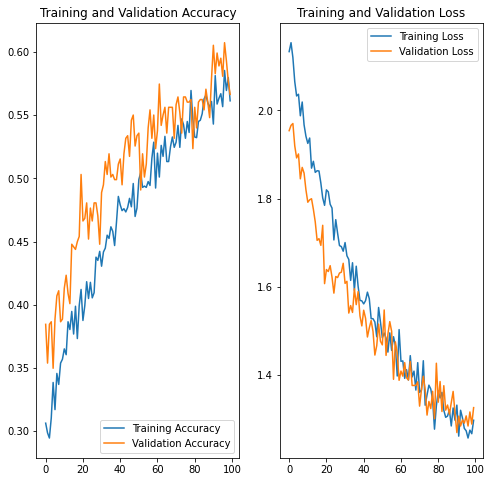

In [179]:
# Visualize Training Result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()